In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace = True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [4]:
km = KMeans(n_clusters=3)
y_pred =km.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

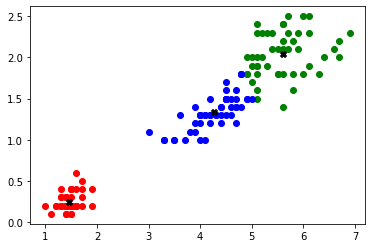

In [5]:
df['cluster'] = y_pred
df1 = df[df['cluster'] ==0]
df2 = df[df['cluster'] ==1]
df3 = df[df['cluster'] ==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='r')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='g')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='X')

In [6]:
#elbow plot
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

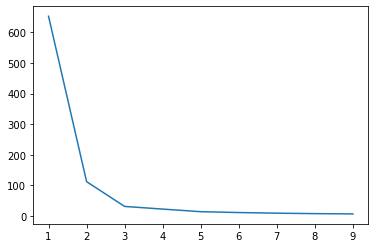

In [7]:
plt.plot(k_range,sse)